# Inaugural Project - Anna, Signe and Klara

This project examines the solution to an exchange economy with two consumers. We calibrate and solve the model to find allocations and prices, and finally we illustrate the answers. 

# Imports and set magics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import minimize

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# We import our project from the py-file
from inauguralproject import ExchangeEconomyClass

# We import our class
economy = ExchangeEconomyClass()

# Answers to questions

**1. Illustrating the Edgeworth box**

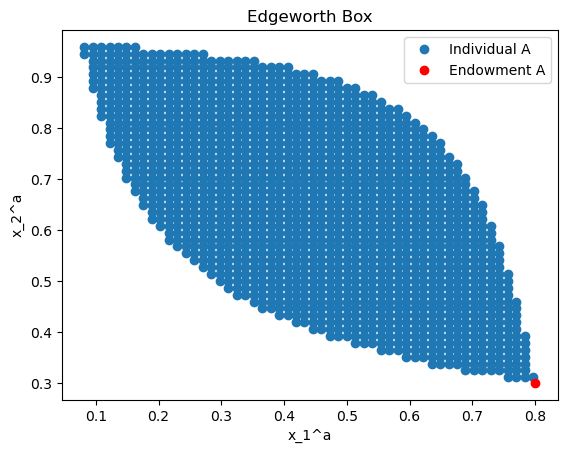

In [2]:
# We plot the Edgeworth box, using the function defined in ExchangeEconomyClass.
economy.plot_edgeworth_box(75)

**2. Error in the market clearing conditions**

In order to calculate the error in the market clearing condition for p1 in P1 we start by defining the number of times we whish to check the price level. We initialize p1 at 0.5 and in increments of 75 until p1 = 2.5 we calculate the two epsilons (defined as given) and hereby calculate the excess demand of the two goods. 
We print the values and store them in a dictionary. 
From this dictionary we plot the two epsilons as a function of the price p1.

For p1 = 0.50: epsilon1 = 0.5333 and epsilon2 = -0.2667
For p1 = 0.55: epsilon1 = 0.4241 and epsilon2 = -0.2347
For p1 = 0.58: epsilon1 = 0.3770 and epsilon2 = -0.2187
For p1 = 0.61: epsilon1 = 0.3341 and epsilon2 = -0.2027
For p1 = 0.63: epsilon1 = 0.2947 and epsilon2 = -0.1867
For p1 = 0.66: epsilon1 = 0.2586 and epsilon2 = -0.1707
For p1 = 0.69: epsilon1 = 0.2252 and epsilon2 = -0.1547
For p1 = 0.71: epsilon1 = 0.1944 and epsilon2 = -0.1387
For p1 = 0.74: epsilon1 = 0.1658 and epsilon2 = -0.1227
For p1 = 0.77: epsilon1 = 0.1391 and epsilon2 = -0.1067
For p1 = 0.79: epsilon1 = 0.1143 and epsilon2 = -0.0907
For p1 = 0.82: epsilon1 = 0.0911 and epsilon2 = -0.0747
For p1 = 0.85: epsilon1 = 0.0693 and epsilon2 = -0.0587
For p1 = 0.87: epsilon1 = 0.0489 and epsilon2 = -0.0427
For p1 = 0.90: epsilon1 = 0.0296 and epsilon2 = -0.0267
For p1 = 0.93: epsilon1 = 0.0115 and epsilon2 = -0.0107
For p1 = 0.95: epsilon1 = -0.0056 and epsilon2 = 0.0053
For p1 = 0.98: epsilon1 = -0.0218 and epsilon2 =

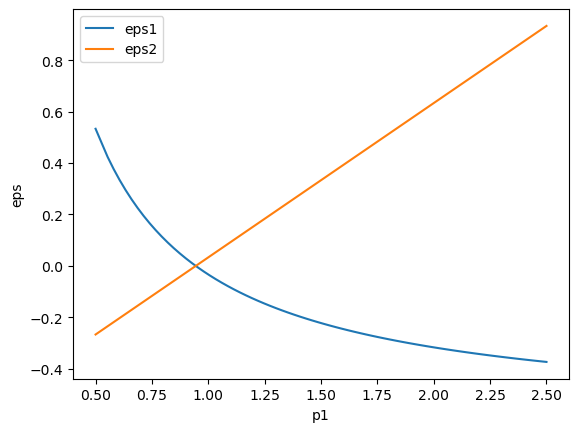

In [3]:
# Calculating the errors, where N = 75
economy.calc_eps(N = 75)

# Plotting the errors
economy.plot_eps(N = 75)


**3. The market clearing price**

To find the market clearing price, we start by setting an intial guess of p1, and a tolerance level for how close the errors has to be to zero before we accept the market clearing price. We do this by an itterative search, which takes the conditions into account, and combines the error terms such that we find a price for which the errors together are minimised. When the errors are within the tolerance level, we get a price for which the market clears. If the errors does not get close enough to zero the code prints "No price found where the market clears".

(A lot of the code beneath should be put into the py file, but we could not make it work)

In [4]:
# Find market clearing and print results
economy.solve_3()

Minimum combined error: 1.5090938108451628e-07 at price: 0.94400
Epsilon1: 0.0002824858757060622, Epsilon2: -0.0002666666666666373


{'Optimal Price for Consumer A': '0.944'}

This means that the market clearing price is 0.944, and is found where eps1 = 0.0003 and eps2 = -0.0003, which is inside our tolerance level. 

**4a. Find the allocation if only prices in P1 can be chosen**

To solve the maximation problem, we first define an objective function to return the utility for A. As the optimizer is by default minimizing, we return the negative value of utility. Next, we call the solver function, minizing our just defined objective function within the bounds (0.5, 2.5), meaning p1 is defined within P1. Lastly, we unpack the solution set from the optimization, and solve for the allocation with the given price.  

In [5]:
# We import our function defined in ExchangeEconomyClass to solve for the allocation, given the conditions.

economy.solve_4a()

x1A: 0.3193, x2A: 1.2130, x1B: 0.3790, x2B: 0.3600, p1: 1.8993, utility: 0.7774


 message: Solution found.
 success: True
  status: 0
     fun: -0.6336208506936606
       x: 1.899346192955355
     nit: 9
    nfev: 9

This implies that the optimal allocation if only prices in P1 can be chosen is: x1A = 0.32, x2A = 1.21, x1B = 0.38, x2B = 0.36 and p1 = 1.90, for which we get the max utility of 0.78.

**4b. Find the allocation when any positive price can be chosen**

In the same way as above we import the function defined under the given conditions.

In [6]:
# We import our function defined in ExchangeEconomyClass to solve for the allocation, given the conditions.
economy.solve_4b()

x1A: 0.3193, x2A: 1.2130, x1B: 0.3790, x2B: 0.3600, p1: 1.8993, utility: 0.7774


 message: Solution found.
 success: True
  status: 0
     fun: -0.6336208506935825
       x: 1.899344670305824
     nit: 13
    nfev: 13

This implies that we actually get the same allocation as in 4a. The optimal allocation if any positive prices can be chosen is: x1A = 0.32, x2A = 1.21, x1B = 0.38, x2B = 0.36 and p1 = 1.90, for which we get the max utility of 0.78.

**5a. Find the allocation if the choice set is restricted to *C*.** 

(The function in the py file does not give an output, but we have tried to set up a code, which explains our thoughts on how to approach the problem.)

In [7]:
# We import our function defined in ExchangeEconomyClass to solve for the allocation, given the conditions in C.
economy.solve_5a()

{'Optimal Price for Consumer A': '0.136',
 'Maximum Utility of Consumer A': '0.742',
 'Allocation of x1A': '0.581',
 'Allocation of x2A': '0.838',
 'Allocation of x1B': '0.419',
 'Allocation of x2B': '0.162'}

When the allocations are restricted to the choice set C, we find that consumer A consumes more than consumer B of both goods, however relatively more of x2. 

**5b. Find the allocation if no further restrictions are imposed**

In [8]:
economy.solve_5b()

{'Optimal Price for Consumer A': '0.429',
 'Maximum Utility of Consumer A': '0.500',
 'Allocation of x1A': '0.500',
 'Allocation of x2A': '0.500',
 'Allocation of x1B': '0.500',
 'Allocation of x2B': '0.500'}

We find that consumption levels without further restrictions are allocated evenly between the two consumers at a price of 0.43.

Now, we assume that the consumption levels are chosen by a utilitarian social planner.

**6a. Find the resulting allocation**

In [9]:
economy.solve_6a()

{'Optimal Price for Consumer A': '1.498',
 'Maximum Utility of Consumer A': '0.529',
 'Allocation of x1A': '0.333',
 'Allocation of x2A': '0.667',
 'Allocation of x1B': '0.667',
 'Allocation of x2B': '0.333'}

The resulting allocation after the utilitarian social planner maximizes the aggregate utility, we find that the optimal price is given by 1.5, and utility for consumer A is 0.5.

**6b. Comparing to other results**

In [10]:
economy.solve_6b()


,Optimal Price for Consumer A,Maximum Utility of Consumer A,Allocation of x1A,Allocation of x2A,Allocation of x1B,Allocation of x2B
3,0.944,NaN,NaN,NaN,NaN,NaN
5a,0.136,0.742,0.581,0.838,0.419,0.162
5b,0.429,0.500,0.500,0.500,0.500,0.500
6a,1.498,0.529,0.333,0.667,0.667,0.333


From the table above, we see the price, utility and allocation of the two goods between the two consumers are shown. 
Regarding the optimal price, we see that for question 3 the price is 9.4 which was for the price beeing in the set P1. In 5a we impose the restriction, that allocation is restricted to being in C, the price falls (compared to 3) to 0.13. In 5b there is no more restrictions, and hence we see that the price increases to 4.3. Finally we see that in 6a, from the social planner, the price is at its highest at 1.5. 

Solution 3 is kind of unique as we only have the optimal price for allocation, therefore the futher comparison will be between the later 3 solutions. Wee see that as the price increases from 5a to 5b, the utility for consumer A drops, hence the consumption of good 1 and 2 for consumer a drops as the price increases. As the consumption for consumer A drops, the consumption for consumer B increases hence their utility must increase, all things equal. 

In the last solution, 6a, we see that as the price increases to the highest of the solutions to 1.5, the utility for consumer A actually increases compared to solution 5b. This might be explained by the  

**7. Draw a set W with 50 elements**

In [11]:
economy.solve_7()

Elements of W:
Element 1: w1A = 0.6862, w2A = 0.8630
Element 2: w1A = 0.6281, w2A = 0.9404
Element 3: w1A = 0.0110, w2A = 0.2268
Element 4: w1A = 0.9160, w2A = 0.5722
Element 5: w1A = 0.7562, w2A = 0.8378
Element 6: w1A = 0.3338, w2A = 0.0537
Element 7: w1A = 0.0157, w2A = 0.0254
Element 8: w1A = 0.6601, w2A = 0.2108
Element 9: w1A = 0.1133, w2A = 0.4110
Element 10: w1A = 0.5357, w2A = 0.7283
Element 11: w1A = 0.1274, w2A = 0.8700
Element 12: w1A = 0.7932, w2A = 0.6185
Element 13: w1A = 0.7228, w2A = 0.7153
Element 14: w1A = 0.0447, w2A = 0.4125
Element 15: w1A = 0.2726, w2A = 0.8290
Element 16: w1A = 0.7222, w2A = 0.7810
Element 17: w1A = 0.0591, w2A = 0.9362
Element 18: w1A = 0.4401, w2A = 0.3214
Element 19: w1A = 0.4467, w2A = 0.4078
Element 20: w1A = 0.6564, w2A = 0.0396
Element 21: w1A = 0.0868, w2A = 0.5153
Element 22: w1A = 0.5066, w2A = 0.3528
Element 23: w1A = 0.0222, w2A = 0.2628
Element 24: w1A = 0.2651, w2A = 0.5287
Element 25: w1A = 0.8704, w2A = 0.5645
Element 26: w1A = 0

**8. Find market equilibrium allocation and plot in Edgeworth box**